# Week 6 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

F:\python\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

<span style="color:blue">The output of the first excercise is too loooooooooong! So I only show the code and don't leave the output here. It's kinda meaningless. I know the intention of this exercise is to let us know which kind of distribution of data should use which algorithms. However, I think we should understand it by mathmatical mechanisms. Some of them are not complex at all...

In [ ]:
clf_bayes = sklearn.naive_bayes.GaussianNB()


clf_linear = sklearn.svm.SVC(kernel = 'linear', probability = True)
clf_poly = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True)
clf_KN = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')


clf_log = sklearn.linear_model.LogisticRegression()


clf_decison = sklearn.tree.DecisionTreeClassifier()
clf_forest = sklearn.ensemble.RandomForestClassifier()


clf_network = sklearn.neural_network.MLPClassifier()


clf_ensemble = sklearn.ensemble.GradientBoostingClassifier()

In [ ]:
noise = 0.3

#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.random())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

lucem_illud.plotter(dfTrain)


clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_linear.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_poly.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_log.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_decison.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_forest.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_network.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_ensemble.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


print(lucem_illud.evaluateClassifier(clf, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_linear, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_poly, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_log, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_decison, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_forest, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_network, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_ensemble, dfTest))


In [ ]:
noise = 0.6

#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.random())
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

lucem_illud.plotter(dfTrain)


clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_linear.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_poly.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_log.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_decison.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_forest.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_network.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_ensemble.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


print(lucem_illud.evaluateClassifier(clf, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_linear, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_poly, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_log, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_decison, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_forest, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_network, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_ensemble, dfTest))

In [ ]:
noise = 0.1

#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.random())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

lucem_illud.plotter(dfTrain)


clf = sklearn.neighbors.KNeighborsClassifier(3, weights='distance')# k, 'distance' or 'uniform'

clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_linear.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_poly.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_log.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_decison.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_forest.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_network.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_ensemble.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


print(lucem_illud.evaluateClassifier(clf, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_linear, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_poly, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_log, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_decison, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_forest, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_network, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_ensemble, dfTest))

In [ ]:
noise = 0.7

#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.random())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

lucem_illud.plotter(dfTrain)


clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_linear.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_poly.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_log.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_decison.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_forest.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_network.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_ensemble.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


print(lucem_illud.evaluateClassifier(clf, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_linear, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_poly, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_log, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_decison, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_forest, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_network, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_ensemble, dfTest))

In [ ]:
noise = 0.2

dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.random())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

lucem_illud.plotter(dfTrain)


clf = sklearn.neighbors.KNeighborsClassifier(2, weights='distance')# k, 'distance' or 'uniform'

clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_linear.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_poly.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_log.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_decison.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_forest.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_network.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_ensemble.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


print(lucem_illud.evaluateClassifier(clf, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_linear, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_poly, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_log, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_decison, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_forest, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_network, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_ensemble, dfTest))

In [ ]:
noise = 0.8

#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.random())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) #Please try this one
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

lucem_illud.plotter(dfTrain)


clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_linear.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_poly.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_log.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_decison.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_forest.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_network.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_ensemble.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


print(lucem_illud.evaluateClassifier(clf, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_linear, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_poly, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_log, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_decison, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_forest, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_network, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_ensemble, dfTest))

In [ ]:
noise = 0.2

#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.random())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) #Please try this one
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

lucem_illud.plotter(dfTrain)


clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_linear.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_poly.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_log.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_decison.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_forest.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_network.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_ensemble.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


print(lucem_illud.evaluateClassifier(clf, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_linear, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_poly, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_log, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_decison, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_forest, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_network, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_ensemble, dfTest))

In [ ]:
noise = 0.1

#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.random())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

lucem_illud.plotter(dfTrain)


clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_linear.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_poly.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_log.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_decison.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_forest.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_network.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_ensemble.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


print(lucem_illud.evaluateClassifier(clf, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_linear, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_poly, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_log, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_decison, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_forest, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_network, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_ensemble, dfTest))

## Now we do the same for real data

In [ ]:
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadReddit())
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSpam())

In [ ]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

In [ ]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_linear.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_poly.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_log.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_decison.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_forest.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_network.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_ensemble.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


print(lucem_illud.evaluateClassifier(clf, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_linear, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_poly, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_log, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_decison, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_forest, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_network, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_ensemble, dfTest))

In [ ]:
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadReddit())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSpam())

clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_linear.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_poly.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_log.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_decison.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_forest.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_network.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_ensemble.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


print(lucem_illud.evaluateClassifier(clf, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_linear, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_poly, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_log, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_decison, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_forest, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_network, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_ensemble, dfTest))

In [ ]:
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadReddit())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSpam())

clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_linear.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_poly.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_log.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_decison.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_forest.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_network.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_ensemble.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


print(lucem_illud.evaluateClassifier(clf, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_linear, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_poly, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_log, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_decison, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_forest, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_network, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_ensemble, dfTest))

In [ ]:
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadReddit())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())
dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.loadSpam())

clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_linear.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_poly.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_log.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_decison.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_forest.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_network.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


clf_ensemble.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])


print(lucem_illud.evaluateClassifier(clf, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_linear, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_bayes, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_poly, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_log, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_decison, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_forest, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_network, dfTest))
print('')
print(lucem_illud.evaluateClassifier(clf_ensemble, dfTest))

<span style="color:blue">
SVC's linear, naive bayses and high KNN and linear regression are all linear or quansi linear model. The are not suitable for models with nonlinear, flexible or high-noise data.
<span style="color:blue">
low KNN, decision tree, random forest, SVC's "rbf", neural network, and ensemble model are suitable for non-linear data and some linear data. However, low KNN is not suitable highly linear model.
<span style="color:blue">
However, in some real datasets, since we usually don't know much about the data structure, we have to test which algorithm performs the best by corss-validation.

In [2]:
targetDir = 'plato'
platoText = []
platoFileName = []

for file in (file for file in os.scandir(targetDir) if file.is_file() and not file.name.startswith('.')):
    with open(file.path, encoding = 'latin-1') as f:
        platoText.append(f.read())
    platoFileName.append(file.name)

Plato = pandas.DataFrame({'text' : platoText, 'book' : platoFileName, 'author' : 'Plato'})

targetDir = 'aristotle'
platoText = []
platoFileName = []

for file in (file for file in os.scandir(targetDir) if file.is_file() and not file.name.startswith('.')):
    with open(file.path, encoding = 'latin-1') as f:
        platoText.append(f.read())
    platoFileName.append(file.name)

Aristotle = pandas.DataFrame({'text' : platoText, 'book' : platoFileName, 'author' : 'Aristotle'})



targetDir = 'kant'
platoText = []
platoFileName = []

for file in (file for file in os.scandir(targetDir) if file.is_file() and not file.name.startswith('.')):
    with open(file.path, encoding = 'latin-1') as f:
        platoText.append(f.read())
    platoFileName.append(file.name)

Kant = pandas.DataFrame({'text' : platoText, 'book' : platoFileName, 'author' : 'Kant'})


targetDir = 'Hegel'
platoText = []
platoFileName = []

for file in (file for file in os.scandir(targetDir) if file.is_file() and not file.name.startswith('.')):
    with open(file.path, encoding = 'latin-1') as f:
        platoText.append(f.read())
    platoFileName.append(file.name)

Hegel = pandas.DataFrame({'text' : platoText, 'book' : platoFileName, 'author' : 'Hegel'})


targetDir = 'nietzsche'
platoText = []
platoFileName = []

for file in (file for file in os.scandir(targetDir) if file.is_file() and not file.name.startswith('.')):
    with open(file.path, encoding = 'latin-1') as f:
        platoText.append(f.read())
    platoFileName.append(file.name)

Nietzsche = pandas.DataFrame({'text' : platoText, 'book' : platoFileName, 'author' : 'Nietzsche'})

targetDir = 'Schopenhauer'
platoText = []
platoFileName = []

for file in (file for file in os.scandir(targetDir) if file.is_file() and not file.name.startswith('.')):
    with open(file.path, encoding = 'latin-1') as f:
        platoText.append(f.read())
    platoFileName.append(file.name)

Schopenhauer = pandas.DataFrame({'text' : platoText, 'book' : platoFileName, 'author' : 'Schopenhauer'})


corpora_df = pandas.concat([Aristotle, Plato, Kant, Hegel, Nietzsche, Schopenhauer])

# Remove some features vectors 
remove = np.array([r'\[\d+\]', r'\(\d+\)', '\n', '\t', '\d+'])
       
for i in range(corpora_df.shape[0]):
    for j in range(len(remove)):
        corpora_df["text"].iloc[i] = re.sub(remove[j], ' ', corpora_df["text"].iloc[i])
        
corpora_df.index = range(len(corpora_df))

corpora_df['category'] = [s == 'Nietzsche' or s == 'Hegel' or s == 'Kant' or s == 'Schopenhauer' for s in corpora_df['author']]

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.

In [3]:
corpora_df['tokenized_text'] = corpora_df['text'].apply(lambda x: nltk.word_tokenize(x))
corpora_df['normalized_text'] = corpora_df['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

In [4]:
holdBackFraction = .3
train_data_df, test_data_df = lucem_illud.trainTestSplit(corpora_df, holdBackFraction=holdBackFraction)

In [5]:
print(len(train_data_df))
print(len(test_data_df))

103
44


## Logistic Regression

In [6]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

In [7]:
TFVects.shape

(103, 34356)

In [8]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [9]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

In [10]:
train_data_df['pca'] = [r for r in reduced_data]

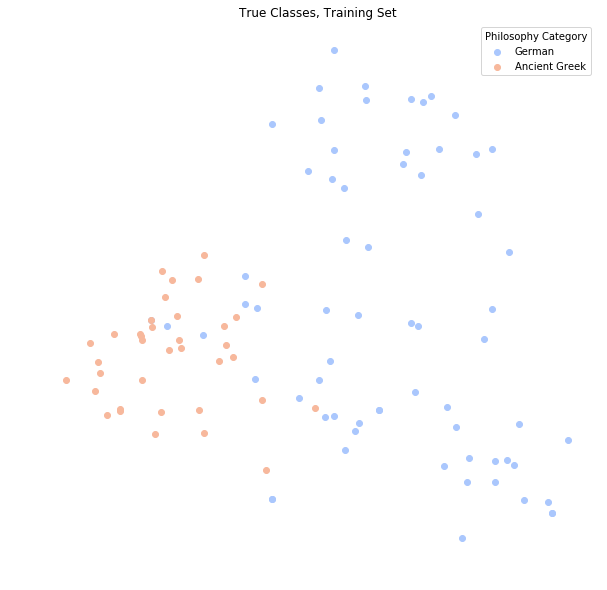

In [11]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "German")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "Ancient Greek")
    
ax.legend(loc = 'upper right', title = 'Philosophy Category')
plt.title('True Classes, Training Set')
plt.show()

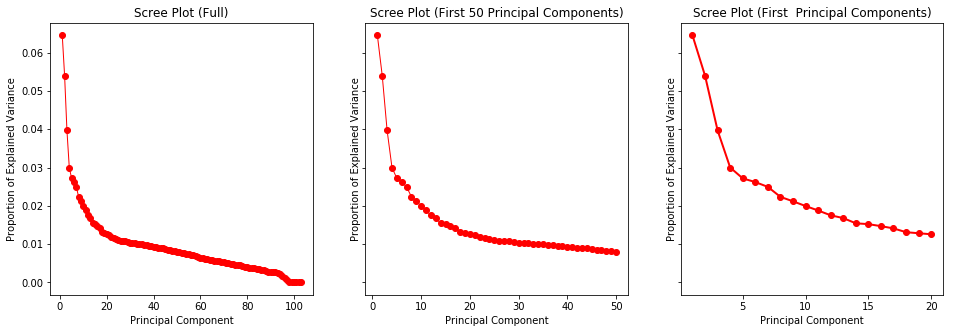

In [12]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First  Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

In [13]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

In [14]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.9514563106796117

In [16]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.8409090909090909

In [17]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.9902912621359223
Testing:
0.9090909090909091


In [18]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.9902912621359223
Testing:
0.8863636363636364


In [19]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.9902912621359223
Testing:
0.8863636363636364


In [20]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.9902912621359223
Testing:
0.8863636363636364


In [21]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l1')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.7961165048543689


In [22]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.6363636363636364


<span style="color:blue"> Although the original testing accuracy is relatively high, it becomes slightly poor when we add different penalties!  

## Naive Bayes

In [23]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [24]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.7864077669902912
Testing:
0.6363636363636364


In [25]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision

In [26]:
sklearn.metrics.precision_score(test_data_df['nb_predict'], test_data_df['category'])

0.43478260869565216

Recall:

In [27]:
sklearn.metrics.recall_score(test_data_df['nb_predict'], test_data_df['category'])

0.7692307692307693

F1-measure:

In [28]:
sklearn.metrics.f1_score(test_data_df['nb_predict'], test_data_df['category'])

0.5555555555555555

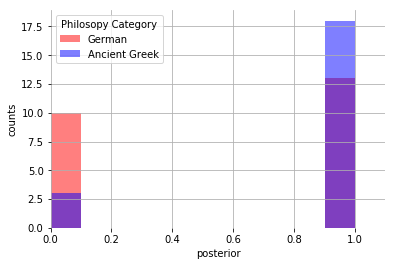

In [29]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'German', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'Ancient Greek', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Philosopy Category")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

<span style="color:blue"> The prediction of Ancient Greek seems not accurate. Besides, naive bayes performs much worse than binary logistic regression.

In [30]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'German' : [],
    'German_log_prob' : [],
    'Ancient Greek' : [],
    'Ancient_Greek_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['German'].append(TFVectorizer.get_feature_names()[i])
    words_dict['German_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Ancient Greek'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Ancient_Greek_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,Ancient Greek,Ancient_Greek_log_prob,German,German_log_prob
0,merely,-0.029853,does,-0.052644
1,possible,-0.029853,given,-0.052644
2,thing,-0.029853,like,-0.052644
3,time,-0.029853,long,-0.052644
4,true,-0.029853,man,-0.052644
5,work,-0.029853,nature,-0.052644
6,does,-0.045120,reason,-0.052644
7,end,-0.045120,said,-0.052644
8,existence,-0.045120,things,-0.052644
9,far,-0.045120,able,-0.080043


## Multinomial Naive Bayes

In [92]:
corpora_df['category'][0:58] = 'Ancient Greek'
corpora_df['category'][58:104] = 'German Classics'
corpora_df['category'][104:147] = 'Contemporary'

In [93]:
holdBackFraction = .3
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(corpora_df, holdBackFraction=holdBackFraction)

In [94]:
print(len(train_ng_df))
print(len(test_ng_df))

103
44


In [95]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [96]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [97]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.9902912621359223


In [98]:
train_ng_df[['category', 'nb_predict']][:10]

,category,nb_predict
139,Contemporary,Contemporary
6,Ancient Greek,Ancient Greek
143,Contemporary,Contemporary
15,Ancient Greek,Ancient Greek
47,Ancient Greek,Ancient Greek
23,Ancient Greek,Ancient Greek
74,German Classics,German Classics
115,Contemporary,Contemporary
122,Contemporary,Contemporary
83,German Classics,German Classics


In [99]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.9318181818181818


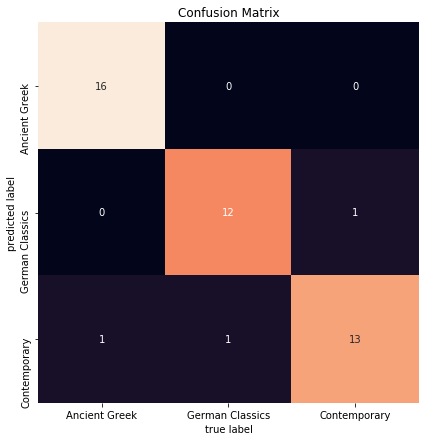

In [100]:
fig, ax = plt.subplots(figsize = (7,7))
lucem_illud.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

In [101]:
print(sklearn.metrics.precision_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #F-1 measure

0.9348484848484848
0.9318181818181818
0.9326493777904435


In [102]:
lucem_illud.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
German Classics,0.916092,0.850216,0.068182,0.928571,0.866667
Contemporary,0.945409,0.874798,0.045455,0.923077,0.923077
Ancient Greek,0.982143,0.941176,0.022727,0.941176,1.000000


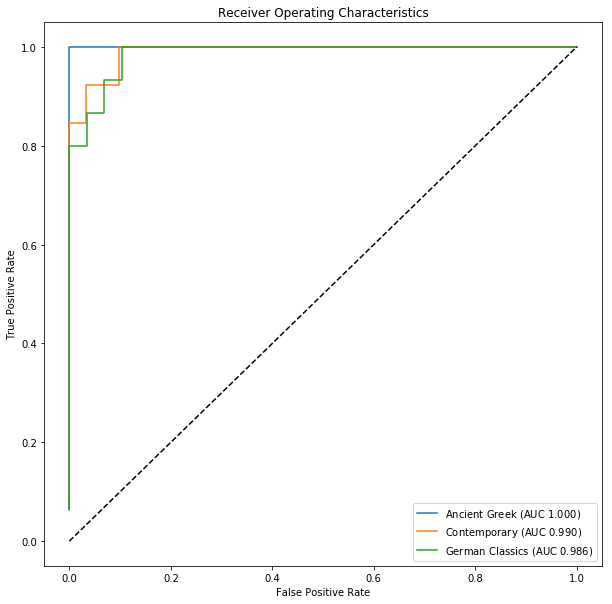

In [103]:
lucem_illud.plotMultiROC(MultinomialNB_ng, test_ng_df)

In [104]:
def predict_category(s, model, tfidf): #We just define a simple function here
    a = np.zeros((1, len(tfidf.vocabulary_)))
    for w in nltk.word_tokenize(s):
        try:
            a[:,tfidf.vocabulary_[lucem_illud.stemmer_basic.stem(w.lower())]] = 1
        except KeyError:
            print("Warning: '{}' not in vocabulary".format(w))
    return model.predict(a)[0]

<span style="color:blue"> The predictive accuracy of Ancient Greek is the highest and that of German Classics is the lowest.

In [105]:
predict_category('moral philosophy', MultinomialNB_ng, TFVectorizer_ng)

'German Classics'

# Decision Trees

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

In [156]:
holdBackFraction = .3
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(corpora_df, holdBackFraction=holdBackFraction)

In [157]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

In [158]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(train_ng_df['vect'], axis =0), train_ng_df['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [159]:
lucem_illud.evaluateClassifier(clf_tree, test_ng_df)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
German Classics,0.802083,0.624242,0.136364,0.800000,0.666667
Contemporary,0.816092,0.719697,0.136364,0.909091,0.666667
Ancient Greek,0.793028,0.620902,0.227273,0.652174,0.882353


Lets look at accuracy:

In [160]:
sklearn.metrics.accuracy_score(test_ng_df['category'],clf_tree.predict(np.stack(test_ng_df['vect'], axis = 0)))

0.75

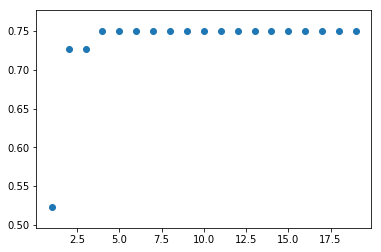

In [161]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(train_ng_df['vect'], axis =0), train_ng_df['category'])
    score = sklearn.metrics.accuracy_score(test_ng_df['category'], tree2.predict(np.stack(test_ng_df['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

In [162]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [163]:
bag.fit(np.stack(train_ng_df['vect'], axis =0), train_ng_df['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [164]:
lucem_illud.evaluateClassifier(bag, test_ng_df)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
German Classics,0.817708,0.683502,0.113636,0.888889,0.666667
Contemporary,0.916092,0.850216,0.068182,0.928571,0.866667
Ancient Greek,0.830065,0.675707,0.181818,0.714286,0.882353


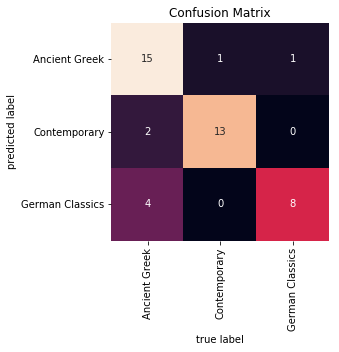

In [165]:
lucem_illud.plotConfusionMatrix(bag, test_ng_df)

<span style="color:blue"> Decision Tree performs not well. But when we build an ensemble classifier by bagging trees into a random forest, the accuracy is improved a lot.

# K-Nearest Neighbors

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [166]:
holdBackFraction = .3
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(corpora_df, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [167]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [168]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [169]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [170]:
lucem_illud.evaluateClassifier(clf_knearest, train_ng_df)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
German Classics,0.963420,0.896289,0.038835,0.914286,0.969697
Contemporary,0.948810,0.823325,0.058252,0.843750,0.964286
Ancient Greek,0.928571,0.915395,0.058252,1.000000,0.857143


And lets look at the testing data

In [171]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.9090909090909091


Let's produce another confusion matrix:

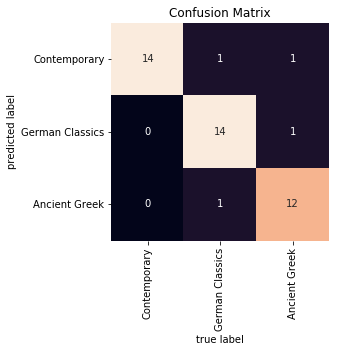

In [172]:
lucem_illud.plotConfusionMatrix(clf_knearest, test_ng_df)

<span style="color:blue"> 15KNN performs very good. This might because the boundary of these three categories are moderately non-linear so that the KNN with neither high nor low K performs good.

# SVMs

In [173]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in corpora_df['normalized_text']])
corpora_df['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

In [174]:
holdBackFraction = .3
train_redditDf, test_redditDf = lucem_illud.trainTestSplit(corpora_df, holdBackFraction=holdBackFraction)

In [175]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [176]:
lucem_illud.evaluateClassifier(clf_svm, test_redditDf)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
German Classics,0.923077,0.891608,0.045455,1.000000,0.846154
Contemporary,0.983333,0.933333,0.022727,0.933333,1.000000
Ancient Greek,0.981481,0.944444,0.022727,0.944444,1.000000


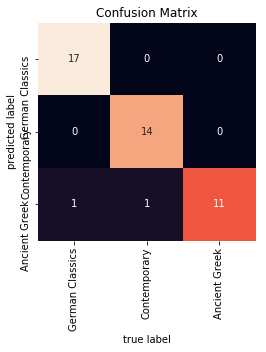

In [177]:
lucem_illud.plotConfusionMatrix(clf_svm, test_redditDf)

<span style="color:blue"> SVM also performs very well.

# Neural Nets

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [178]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [179]:
lucem_illud.evaluateClassifier(clf_nn, test_redditDf)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
German Classics,0.945409,0.874798,0.045455,0.923077,0.923077
Contemporary,0.983333,0.933333,0.022727,0.933333,1.000000
Ancient Greek,0.970588,0.963904,0.022727,1.000000,0.941176


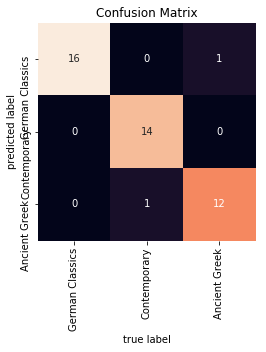

In [180]:
lucem_illud.plotConfusionMatrix(clf_nn, test_redditDf)

<span style="color:blue"> Neural Networks has the highest predictive power comparing with other methods. It can deal with non-linear boundary well.